## Overview 
This is a notebook to work through the titanic survival 
data set and build a few different classification models.

- author: kochhar@gmail.com
- date: jan 18, 2016

### I: Introduction
In the introduction part, we go through a few basic steps
* Import required libraries
* Load the datasets from disk
* Examine the datasets to find missing, bogus values
* Summarize the data available

### II: Visualisation
In the viz part, we try to understand the contents of the dataset
by examining some relationships between the features and survival
rate.
* Compare features against one another to understand correlations between features
* Compare features against survival to understand any correlation between feature and survival
* Examine facets within features. 
    * Are there any differences in age based on gender?
    * Any differences in fare based on the class of travel? 
    * These can be helpful for figuring out a strategy for imputing values 

### Introduction

In [19]:
from __future__ import print_function
import numpy as np
import pandas as pd

In [20]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
print("Train data:", train.shape)
print("Test data:", test.shape)

Train data: (891, 12)
Test data: (418, 11)


In [21]:
# Let's look at the fitst 5 examples of the training set. 
# Transposed to make each example one column
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [22]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
train[train['Fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Notes on training data
* 891 examples
* 177 examples missing Age, will need to be imputed. 2 missing rows in Embarked, Cabin data is present only in 204 examples
* Fare and age are continuous with different distributions, some normalisation will be helpful

In [25]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [26]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Notes on test data
* 418 examples
* 86 examples missing Age, 1 example missing Fare, only 91 examples with Cabin data 
* Fare and age are continuous with different distributions, normalisation here also.

### Visualisation

In [91]:
# Some imports
import matplotlib.pyplot as plt
import seaborn as sns
# Setup matplotlib and seaborn and stylesheets.
%matplotlib inline
sns.set(font_scale=1.5)
plt.style.use('seaborn-notebook')

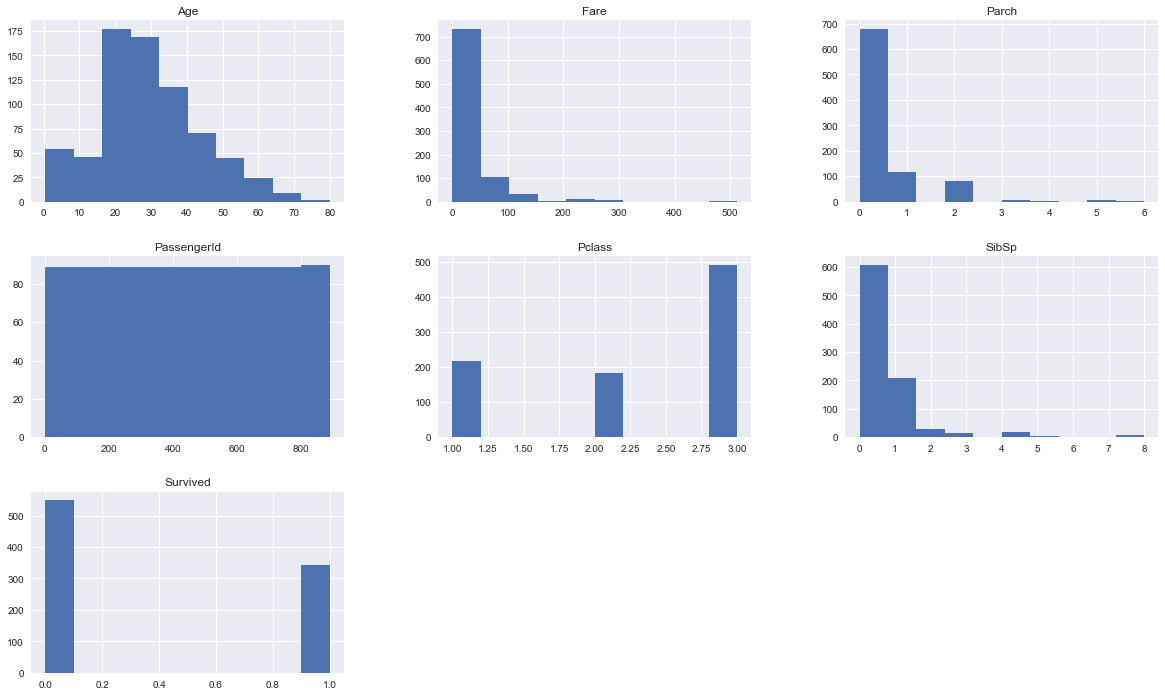

In [92]:
hists = train.hist(bins=10, grid=True, figsize=(18, 12))

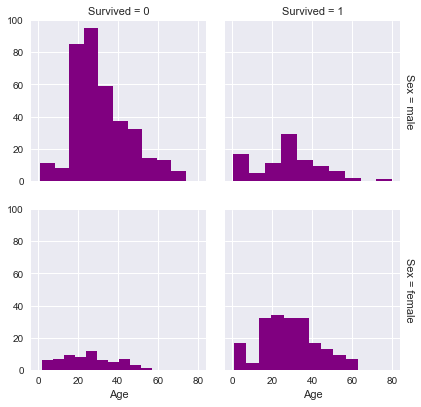

In [115]:
g = sns.FacetGrid(train, row='Sex', col='Survived', margin_titles=True)
g = g.map(plt.hist, 'Age', color='purple')

Clear inidication from the plots above that the survival rates
between men and women are very different.

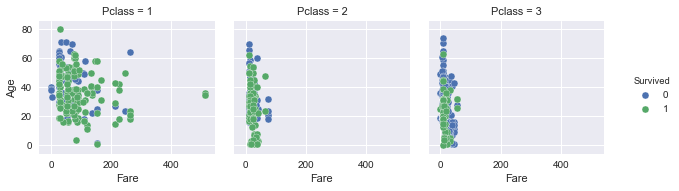

In [94]:
g = sns.FacetGrid(train, hue='Survived', col='Pclass', margin_titles=True)
g = g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()

Very little correlation between 'Fare' and 'Age' and Survival

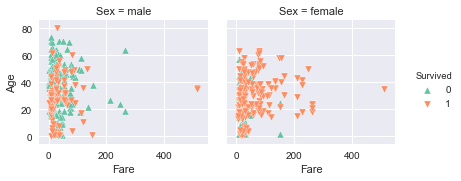

In [102]:
g = sns.FacetGrid(train, hue='Survived', col='Sex', margin_titles=True, palette='Set2', 
                  hue_kws={'marker': ['^', 'v']})
g = g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()
plt.subplots_adjust(top=0.8)


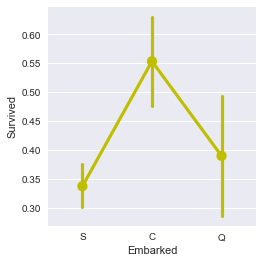

In [124]:
g = sns.factorplot(x='Embarked', y='Survived', data=train, color='y')

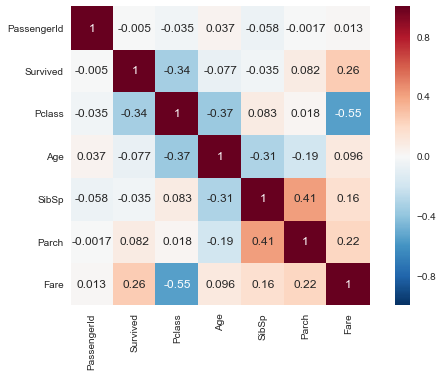

In [148]:
corr = train.corr()
sns.heatmap(corr, vmax=1, square=True, annot=True)

In [166]:
# The correlation matrix above is missing sex because it was non-numeric. 
# Add a new column to the dataframe which encodes sex as an integer.
from sklearn import preprocessing as pp
def encode_sex(data):
    le_sex = pp.LabelEncoder()
    le_sex = le_sex.fit(data.Sex)
    data['SexInt'] = le_sex.transform(data.Sex)
    return data

train = encode_sex(train)
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
SexInt        -0.543351
Name: Survived, dtype: float64

The strongest correlations are with Sex (-), Pclass (-), Fare, Parch & Age (-).

Let's try plotting the distributions of these factors.

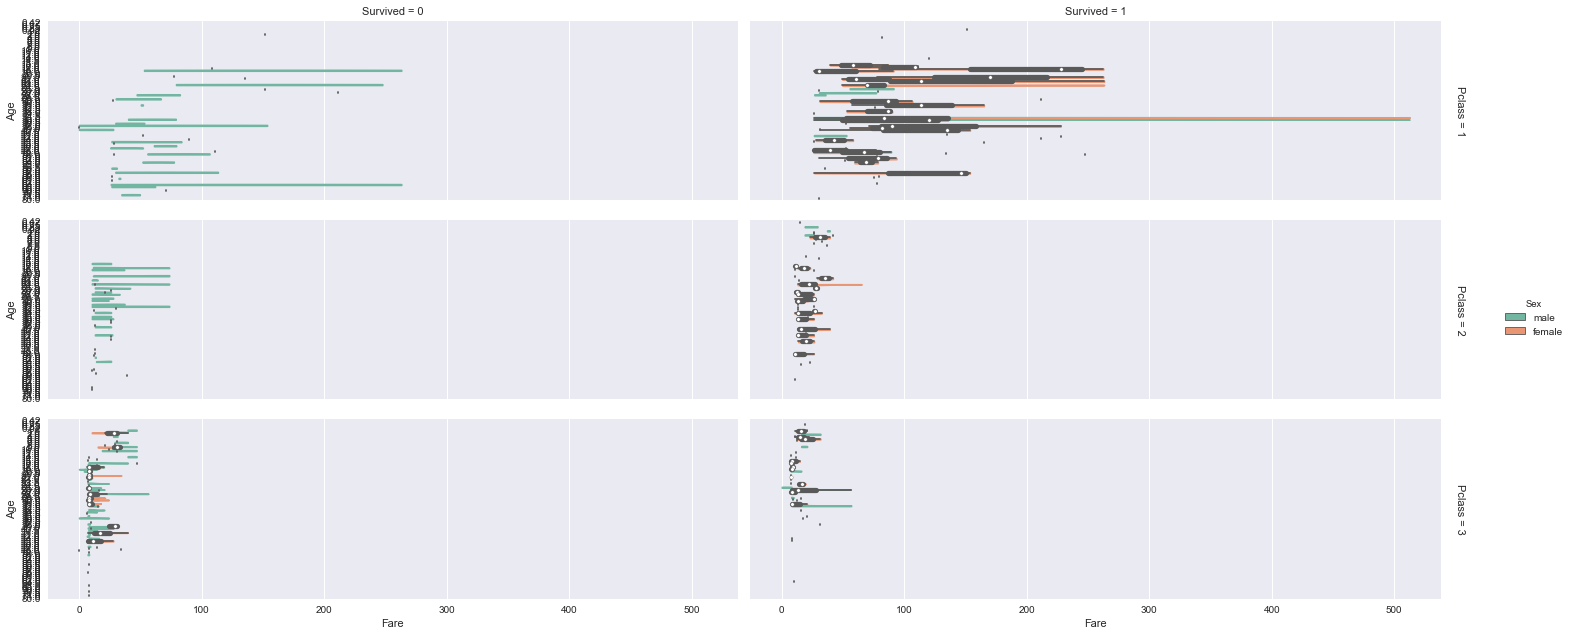

In [168]:
g = sns.factorplot(y='Age', x='Fare',
                   hue='Sex', row='Pclass', col='Survived', 
                   data=train[train.Embarked.notnull()],
                   kind="violin", orient="h", size=3, aspect=3.5, 
                   palette='Set2', split=True, cut=0, margin_titles=True)

This doesn't work out too well because there are too many ages 
to plot the charts in an informative manner. Let's create some 
simplifications for visualisation. We'll split the ages into three 
groups, 'Child', 'Adult' & 'Senior'.

In [153]:
def add_age_group(data):
    data['Age Group'] = 'Senior'
    data.loc[data['Age'] <= 55, 'Age Group'] = 'Adult'
    data.loc[data['Age'] <= 18, 'Age Group'] = 'Child'
    return data

train = add_age_group(train)
train['Age Group'].value_counts()

Adult     535
Senior    217
Child     139
Name: Age Group, dtype: int64

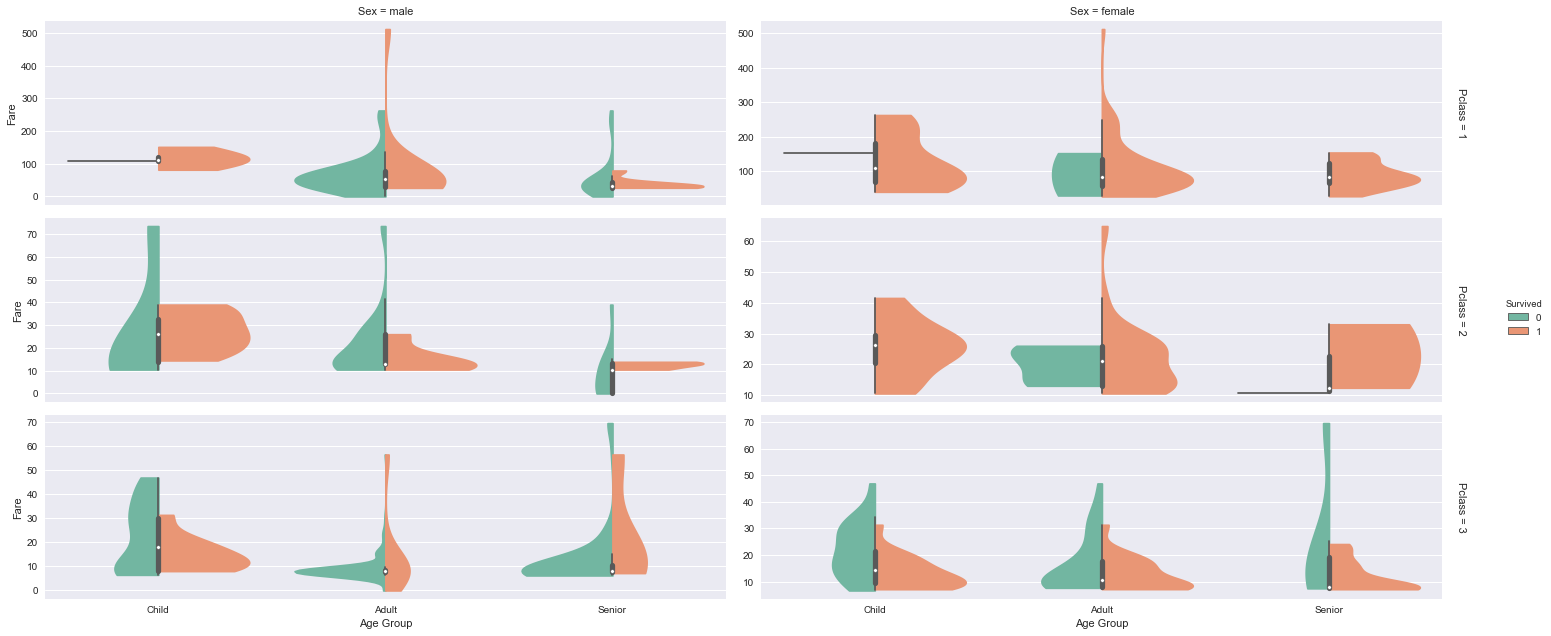

In [175]:
g = sns.factorplot(y='Fare', x='Age Group',
                   hue='Survived', row='Pclass', col='Sex', 
                   data=train[train.Embarked.notnull()],
                   order=['Child', 'Adult', 'Senior'],
                   sharey=False,
                   kind="violin", orient="v", size=3, aspect=3.5, 
                   palette='Set2', split=True, cut=0, margin_titles=True)

Much better now. Some clear distinctions show up in these plots. 
* Female children and seniors all survived in class 1 & 2
* Male children all survived in class 1
* The largest group of deaths were adult males.
* In class 1 & 2, a significant fraction of male children perished.

In [189]:
def extract_titles(data, name_field='Name'):
    data['Title'] = data[name_field].str.extract('\s+(?P<Title>\w+)\.', expand=False)
    return data
    
train = extract_titles(train, name_field='Name')
test = extract_titles(test, name_field='Name')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64